In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import math
import seaborn as sns
import sklearn
from sklearn import linear_model
from sklearn import preprocessing
%matplotlib inline
sns.set_style('white')

In [2]:
credit_cards = pd.read_csv('UCI_Credit_Card.csv')

In [3]:
credit_cards.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
credit_cards.rename(columns={'default.payment.next.month': 'default'}, inplace=True)
credit_cards.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [5]:
credit_cards['default'].value_counts()

0    23364
1     6636
Name: default, dtype: int64

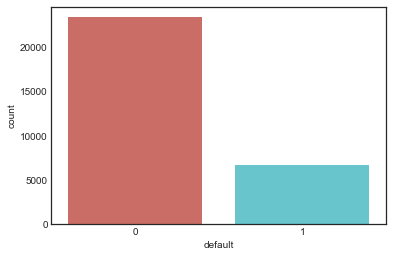

In [6]:
sns.countplot(x='default',data=credit_cards, palette='hls')
plt.show()

In [7]:
credit_cards.groupby('default').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
default,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,47533.365605,43611.165254,40530.445343,39042.268704,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,45181.598855,42036.950573,39540.190476,38271.435503,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068


In [8]:
credit_cards.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,45000.331090,41587.504963,40101.775320,5668.537264,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,42122.600099,39473.816807,38064.427286,5660.327076,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,0.207763


In [9]:
credit_cards.groupby('EDUCATION').mean()

,ID,LIMIT_BAL,SEX,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
EDUCATION,,,,,,,,,,,,,,,,,,,,,
0,17091.357143,217142.857143,1.428571,1.714286,38.857143,-0.500000,-1.000000,-0.928571,-0.857143,-1.071429,...,13350.214286,7409.071429,5272.928571,5945.785714,13030.928571,8825.142857,3620.571429,2541.714286,3007.214286,0.000000
1,14697.212187,212956.069910,1.588663,1.652338,34.231838,-0.233916,-0.408125,-0.425886,-0.461974,-0.479074,...,42931.065187,40388.891261,38668.076051,6780.933585,7306.622201,6560.585735,5804.565612,5776.562211,6422.554842,0.192348
2,15024.237776,147062.437634,1.616964,1.523022,34.722096,0.102210,0.022523,-0.018532,-0.083036,-0.141411,...,44748.779758,41588.566287,40431.943835,5080.463293,5106.711333,4556.800000,4375.387313,4452.678689,4716.487028,0.237349
3,15342.314013,126550.270490,1.595282,1.421192,40.299980,0.132805,0.040879,0.002644,-0.066504,-0.139313,...,38718.582266,35957.469392,34704.597315,4866.397397,5053.454139,3964.056742,3992.658532,3599.658938,3825.749034,0.251576
4,18143.447154,220894.308943,1.658537,1.601626,33.853659,-0.504065,-0.772358,-0.764228,-0.813008,-0.780488,...,39570.268293,33840.113821,32136.130081,5450.512195,6555.008130,9990.626016,5104.861789,5991.642276,4284.967480,0.056911
5,17443.664286,168164.285714,1.660714,1.475000,35.600000,-0.121429,-0.303571,-0.375000,-0.375000,-0.389286,...,62275.767857,53568.014286,46083.860714,5970.714286,8912.921429,7718.510714,4927.332143,4633.246429,7772.114286,0.064286
6,16895.019608,148235.294118,1.509804,1.490196,43.901961,-0.176471,-0.313725,-0.372549,-0.411765,-0.509804,...,54259.490196,44510.745098,39578.509804,9780.450980,6176.431373,7644.941176,5179.490196,11691.137255,14773.901961,0.156863


In [10]:
credit_cards.groupby('AGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default
AGE,,,,,,,,,,,,,,,,,,,,,
21,13814.104478,23283.582090,1.686567,2.104478,1.880597,0.194030,0.089552,0.194030,0.014925,-0.298507,...,12768.373134,11055.074627,7790.910448,2085.776119,1749.716418,1179.865672,1381.865672,827.656716,568.208955,0.208955
22,13799.010714,37928.571429,1.751786,1.969643,1.917857,0.405357,0.401786,0.346429,0.157143,0.078571,...,19718.173214,16932.230357,15539.044643,2369.537500,2408.187500,1845.053571,1743.666071,1661.521429,1542.930357,0.301786
23,14262.792696,59752.953813,1.720730,1.888292,1.905478,0.250269,0.183673,0.131042,0.076262,0.044039,...,23830.878625,22221.128894,21363.386681,3239.650913,3167.992481,2833.618690,2633.437164,2278.273899,2668.021482,0.265306
24,14150.837622,75661.047028,1.685004,1.842059,1.879326,0.223602,0.147294,0.110914,0.052351,0.023957,...,27955.181899,26043.818101,25660.377107,3437.509317,3456.996451,2667.676131,2734.072760,2987.842946,2745.241349,0.266193
25,14541.063238,102731.871838,1.671164,1.779933,1.870995,0.155143,0.069140,0.087690,-0.006745,-0.057336,...,34916.935919,31979.716695,30657.220067,4711.833895,3721.000000,3363.674536,3640.538786,2949.698988,3636.136594,0.254637
26,14593.886943,128813.694268,1.630573,1.773885,1.858280,0.120223,0.038217,-0.021497,-0.075637,-0.123408,...,39513.843949,35831.103503,34551.278662,4783.465764,4635.628185,3940.216561,3638.614650,4086.846338,4628.853503,0.201433
27,14975.387271,147941.773866,1.641842,1.689912,1.834800,0.045362,-0.098172,-0.146242,-0.187542,-0.211239,...,43062.862559,40918.643873,39488.114421,5230.849695,5302.418416,4649.622207,4551.387949,4556.484766,4526.699391,0.211916
28,15146.515969,170943.931867,1.640880,1.664301,1.798439,-0.002839,-0.104329,-0.130589,-0.183818,-0.258339,...,46800.466998,43529.201561,42447.360539,6160.422285,5605.646558,5783.974450,4625.394606,5137.292406,5421.787793,0.202981
29,14927.917757,179401.869159,1.615576,1.621184,1.793769,-0.062928,-0.158255,-0.191900,-0.247975,-0.247352,...,44727.031776,42673.198754,42065.074143,5820.047352,5878.453583,5074.471651,5339.152025,5506.229907,4963.722118,0.195016


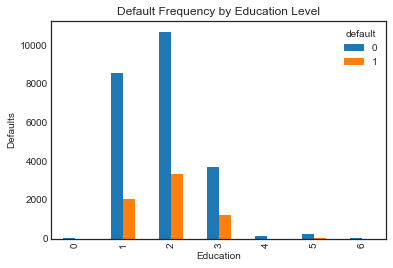

In [11]:
%matplotlib inline
pd.crosstab(credit_cards.EDUCATION,credit_cards.default).plot(kind='bar')
plt.title('Default Frequency by Education Level')
plt.xlabel('Education')
plt.ylabel('Defaults')

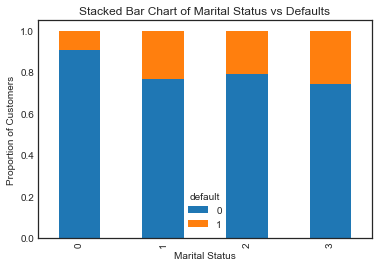

In [12]:
table=pd.crosstab(credit_cards.MARRIAGE,credit_cards.default)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Stacked Bar Chart of Marital Status vs Defaults')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

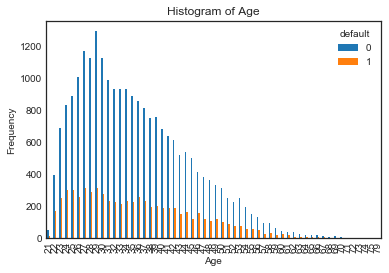

In [13]:
pd.crosstab(credit_cards.AGE,credit_cards.default).plot(kind='bar')
plt.title('Default Frequency for Age')
plt.xlabel('Age')
plt.ylabel('Frequency of Default')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.savefig('hist_age')

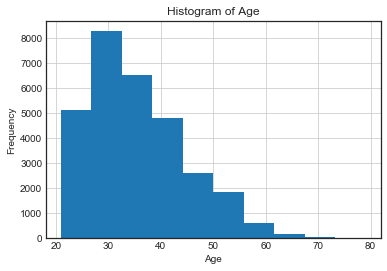

In [14]:
credit_cards.AGE.hist()
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [15]:
credit_cards['PAY_0_dummy'] = np.where((credit_cards['PAY_0']>0), 1,0)
credit_cards['BILL_AMT1_dummy'] = np.where((credit_cards['BILL_AMT1']>0), 1,0)
credit_cards['PAY_AMT1_dummy'] = np.where((credit_cards['PAY_AMT1']>0), 1,0)

In [16]:
credit_cards.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default,PAY_0_dummy,BILL_AMT1_dummy,PAY_AMT1_dummy
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,689.0,0.0,0.0,0.0,0.0,1,1,1,0
1,2,120000.0,2,2,2,26,-1,2,0,0,...,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1,0,1,0
2,3,90000.0,2,2,2,34,0,0,0,0,...,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0,0,1,1
3,4,50000.0,2,2,1,37,0,0,0,0,...,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0,0,1,1
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0,0,1,1


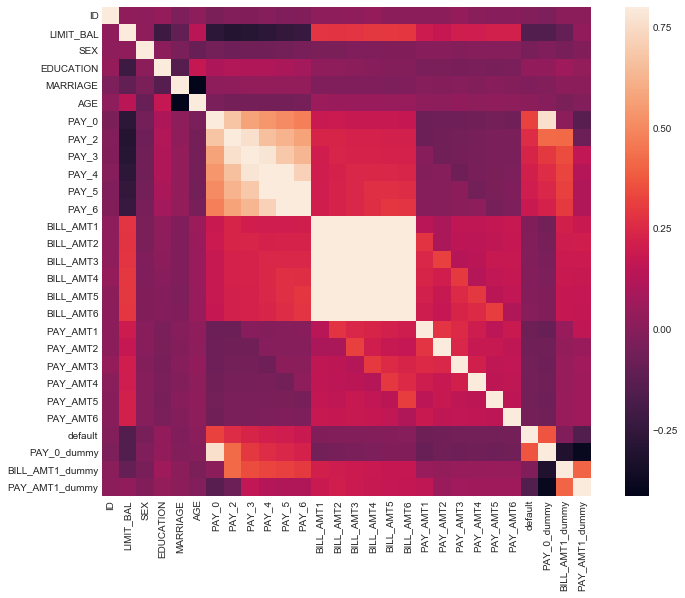

In [17]:
corrmat = credit_cards.corr()

f, ax = plt.subplots(figsize=(12, 9))

sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()

In [18]:
from sklearn import datasets
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
rfe = RFE(logreg, 5)
rfe = rfe.fit(credit_cards.drop(['default'], 1), credit_cards['default'] )
print(rfe.support_)
print(rfe.ranking_)

[False False  True False False False False False  True False False False
 False False False False False False False False False False False False
  True  True  True]
[14 19  1  8  2  9  7  4  1  5  3  6 13 12 21 18 23 20 10 11 16 15 17 22  1
  1  1]


In [19]:
list(credit_cards)

['ID',
 'LIMIT_BAL',
 'SEX',
 'EDUCATION',
 'MARRIAGE',
 'AGE',
 'PAY_0',
 'PAY_2',
 'PAY_3',
 'PAY_4',
 'PAY_5',
 'PAY_6',
 'BILL_AMT1',
 'BILL_AMT2',
 'BILL_AMT3',
 'BILL_AMT4',
 'BILL_AMT5',
 'BILL_AMT6',
 'PAY_AMT1',
 'PAY_AMT2',
 'PAY_AMT3',
 'PAY_AMT4',
 'PAY_AMT5',
 'PAY_AMT6',
 'default',
 'PAY_0_dummy',
 'BILL_AMT1_dummy',
 'PAY_AMT1_dummy']

In [20]:
cols = ['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0', 'PAY_2',
       'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 
        'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 
        'PAY_AMT5', 'PAY_AMT6', 'default', 'PAY_0_dummy', 'BILL_AMT1_dummy', 'PAY_AMT1_dummy']
X = credit_cards[cols]
y = credit_cards['default']

----------------------

### Vanilla Logistic Regression

In [21]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
y_pred = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.78


In [23]:
from sklearn import model_selection
from sklearn.model_selection import cross_val_score
kfold = model_selection.KFold(n_splits=10, random_state=7)
modelCV = LogisticRegression()
scoring = 'accuracy'
results = model_selection.cross_val_score(modelCV, X_train, y_train, cv=kfold, scoring=scoring)
print("10-fold cross validation average accuracy: %.3f" % (results.mean()))

10-fold cross validation average accuracy: 0.776


In [24]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[7060    0]
 [1939    1]]


### Ridge Regression

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/ipykernel_launcher.py:13: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  del sys.path[0]
/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:477: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)


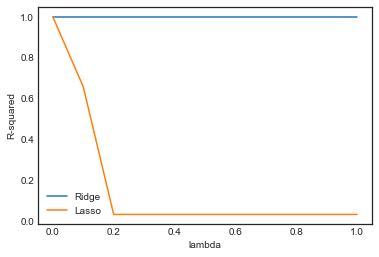

In [25]:
# Store estimates.
estimates = [None,None,None]

# Storing legend information.
labels = []

#Run the model for many alphas.
for lambd in [0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1]:
    ridgeregrBig = linear_model.Ridge(alpha=lambd, fit_intercept=False)
    ridgeregrBig.fit(X_train, y_train)
    
    lassBig = linear_model.Lasso(alpha=lambd)
    lassBig.fit(X_train, y_train)
    
    estimates = np.row_stack((
        estimates,
        [ridgeregrBig.score(X_train, y_train),lassBig.score(X_train, y_train),lambd]))

# Make the data pretty.
estimates_df = pd.DataFrame(
    estimates,
    columns=['Ridge','Lasso','lambda'])
estimates_df.sort_values(by='lambda', inplace=True, ascending=True)

# Plot a line for each parameter.
for var in ['Ridge','Lasso']:
    plt.plot(estimates_df['lambda'], estimates_df[var])
    labels.append(var)
plt.xlabel('lambda')
plt.ylabel('R-squared')
plt.legend(labels)
plt.show()

In [26]:
credit_cards = pd.DataFrame(preprocessing.scale(credit_cards))

ridgeregr = linear_model.Ridge(alpha=.05, fit_intercept=False) 
ridgeregr.fit(X_train, y_train)
print(ridgeregr.score(X_train, y_train))

0.999999999775


In [27]:
from sklearn.linear_model import Ridge

## training the model

ridgeReg = Ridge(alpha=0.05, normalize=True)

ridgeReg.fit(X_train,y_train)

pred = ridgeReg.predict(X_test)
 
ridgeReg.score(X_test,y_test)

0.99736597408693839

### Lasso Regression

In [28]:
lass = linear_model.Lasso(alpha=.05)
lassfit = lass.fit(X_train, y_train)
print(lass.score(X_train, y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print(origparams)
print(lass.score(X_test, y_test))

0.91433947081
[ -1.04078283e-07  -1.34585416e-07  -0.00000000e+00  -0.00000000e+00
  -0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
   0.00000000e+00   0.00000000e+00   0.00000000e+00   0.00000000e+00
  -1.92964186e-07   1.16631173e-07   2.22881007e-08   2.42699880e-08
   3.63652487e-08   1.42363055e-07  -3.87803192e-07  -8.29103715e-08
  -1.42939335e-07  -1.78391843e-07  -2.14091417e-07  -5.15306965e-08
   7.02561565e-01   0.00000000e+00  -0.00000000e+00  -0.00000000e+00
   9.12523966e-02]
0.91408827882


### Conclusion

I used logistic regression, ridge regression, and lasso regression models to evaluate a data set predicting credit card fraud. After exploratory analysis, my feature engineering was simple, creating dummy variables for the initial payment and bill amounts. I then applied recursive feature elimination to decide which features had the most predictive power. I ran the models with just these top five features, as well as with the entire feature set. 

The logistic regression model performed slightly better with the reduced feature set, and the ridge and lasso models performed significantly better with the entire feature set. This makes sense, especially in the case of lasso regression, since it itself is a dimensionality reduction technique. Feeding it a smaller set of feature may result in a model that is underfit, since it has less data to work with to begin. 